# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales **trends, customer behavior, and popular products.** 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to **optimize the store's operations** and **improve customer satisfaction**. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project **aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.**

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

### Import libraries

In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from mpl_toolkits.mplot3d import Axes3D
from mlxtend.frequent_patterns import apriori, association_rules

### Import the dataset

In [11]:
data = pd.read_excel('Online Retail.xlsx')

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Statistical Information

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
data.shape

(541909, 8)

In [16]:
data.duplicated().sum()

5268

In [17]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
data['Country'].is_unique

False

- There are no unique entries in this data.
- The data has 8 columns
- There are a total of 541909 entries/rows


In [20]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [21]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

- The columns **Quantity** and **UnitPrice** has statistical data that is meaningful

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [25]:
data['Quantity'].max()

80995

- the values in the **Quantity** column do not make sense. Let us visualize this for more information

### EDA

In [28]:
def quantity(column_data):
    min_value = min(data['Quantity'])
    max_value = max(data['Quantity'])
    range_value = max_value - min_value
    print(f"{min_value} - {max_value}")
    return range_value

column_data = data['Quantity']
result = quantity(column_data)


##print(f"{min_value} - {max_value}")
print(f"Range: {result}")

-80995 - 80995
Range: 161990


In [29]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [31]:
df =  data.copy()

In [32]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**visualize sales by day, month, year**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [35]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [37]:
# create the month column
df['Month'] = df['InvoiceDate'].dt.month

In [38]:
# create the day of the week column 0 = Monday 6 = Sunday
df['day_of_the_week'] = df['InvoiceDate'].dt.dayofweek

In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_of_the_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4


The dataset **df** contains the following columns:

    InvoiceNo: Invoice number of the transaction
    StockCode: Unique code of the product
    Description: Description of the product
    Quantity: Quantity of the product in the transaction
    InvoiceDate: Date and time of the transaction
    UnitPrice: Unit price of the product
    CustomerID: Unique identifier of the customer
    Country: Country where the transaction occurred
    Month: Month of the year presented in numbers: 1-Jan ... 12-Dec
    day_of_the_week: Day of the week presented in number: 0-Mon ...6-Sun

In [41]:
df['day_of_the_week'].unique()

array([2, 3, 4, 6, 0, 1], dtype=int32)

- There are no sales made in Saturday(5)

In [43]:
monthly_sales = df.groupby('Month')['Quantity'].sum()
weekday_sales = df.groupby('day_of_the_week')['Quantity'].sum()

print(monthly_sales)
print(weekday_sales)

Month
1     308966
2     277989
3     351872
4     289098
5     380391
6     341623
7     391116
8     406199
9     549817
10    570532
11    740286
12    568561
Name: Quantity, dtype: int64
day_of_the_week
0     815354
1     961543
2     969558
3    1167823
4     794440
6     467732
Name: Quantity, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


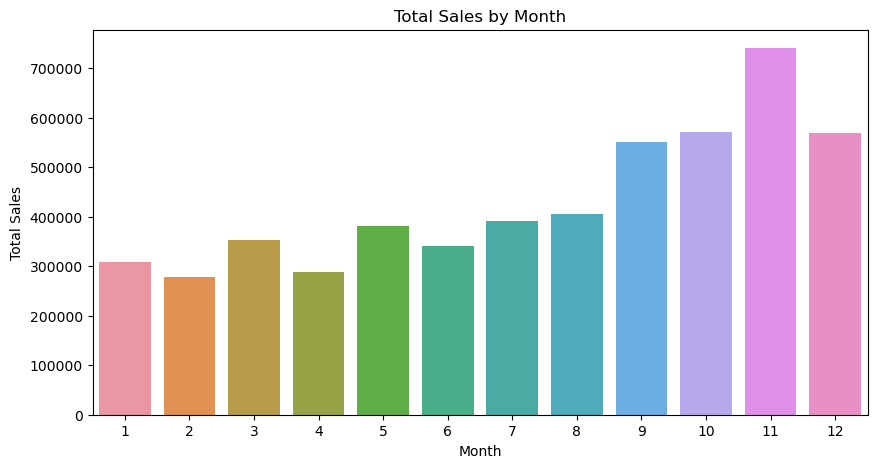

In [44]:
# Monthly Sales

plt.figure(figsize=(10,5))
sbn.barplot(x = monthly_sales.index, y = monthly_sales.values)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

- Highest sales are in November and lowest sales are in February

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


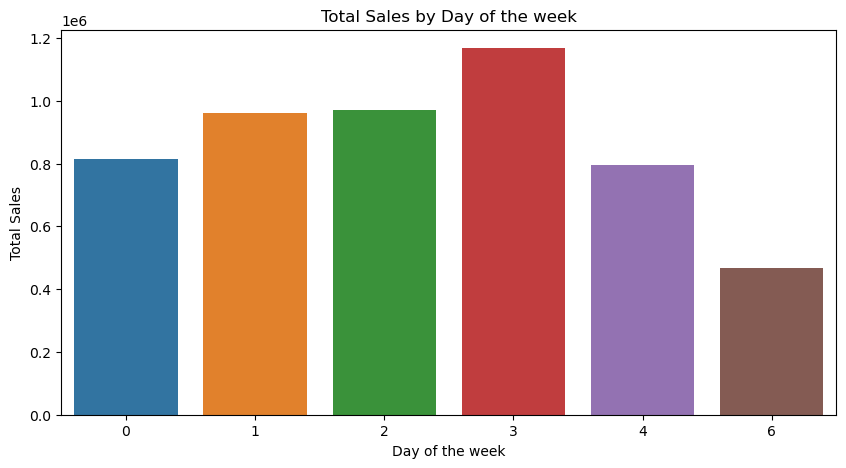

In [46]:
# Weekday sales

plt.figure(figsize =(10,5))
sbn.barplot(x = weekday_sales.index, y = weekday_sales.values)
plt.title('Total Sales by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Total Sales')
plt.show()

- highest sales are on Thurs and lowest sales are on Sunday

In [48]:
# Average sales monthly

average_monthly_sales = df.groupby('Month')['Quantity'].mean()
average_monthly_sales

Month
1      8.790679
2     10.033169
3      9.575269
4      9.663658
5     10.272509
6      9.264604
7      9.897161
8     11.512272
9     10.946860
10     9.392710
11     8.738960
12     8.360453
Name: Quantity, dtype: float64

- this average shows average quantity per transaction in every month

In [50]:
# Average sales daily

average_daily_sales = df.groupby('day_of_the_week')['Quantity'].mean()
average_daily_sales

day_of_the_week
0     8.572657
1     9.444670
2    10.252821
3    11.244529
4     9.665543
6     7.265740
Name: Quantity, dtype: float64

- This shows average quantity per transaction in every day of the week

**Visualizing sales per country**

In [53]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_of_the_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4


In [54]:
# get the total sales price column
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [55]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_of_the_week,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,16.60


The dataset df contains the following columns:

    InvoiceNo: Invoice number of the transaction
    StockCode: Unique code of the product
    Description: Description of the product
    Quantity: Quantity of the product in the transaction
    InvoiceDate: Date and time of the transaction
    UnitPrice: Unit price of the product
    CustomerID: Unique identifier of the customer
    Country: Country where the transaction occurred
    Month: Month of the year presented in numbers: 1-Jan ... 12-Dec
    day_of_the_week: Day of the week presented in number: 0-Mon ...6-Sun
    Sales: The total amount spent in the purchase: UnitPrice * Quantity

In [57]:
# grouping the sales per country

sales_per_country = df.groupby('Country')['Sales'].sum()
sales_per_country

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

In [58]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


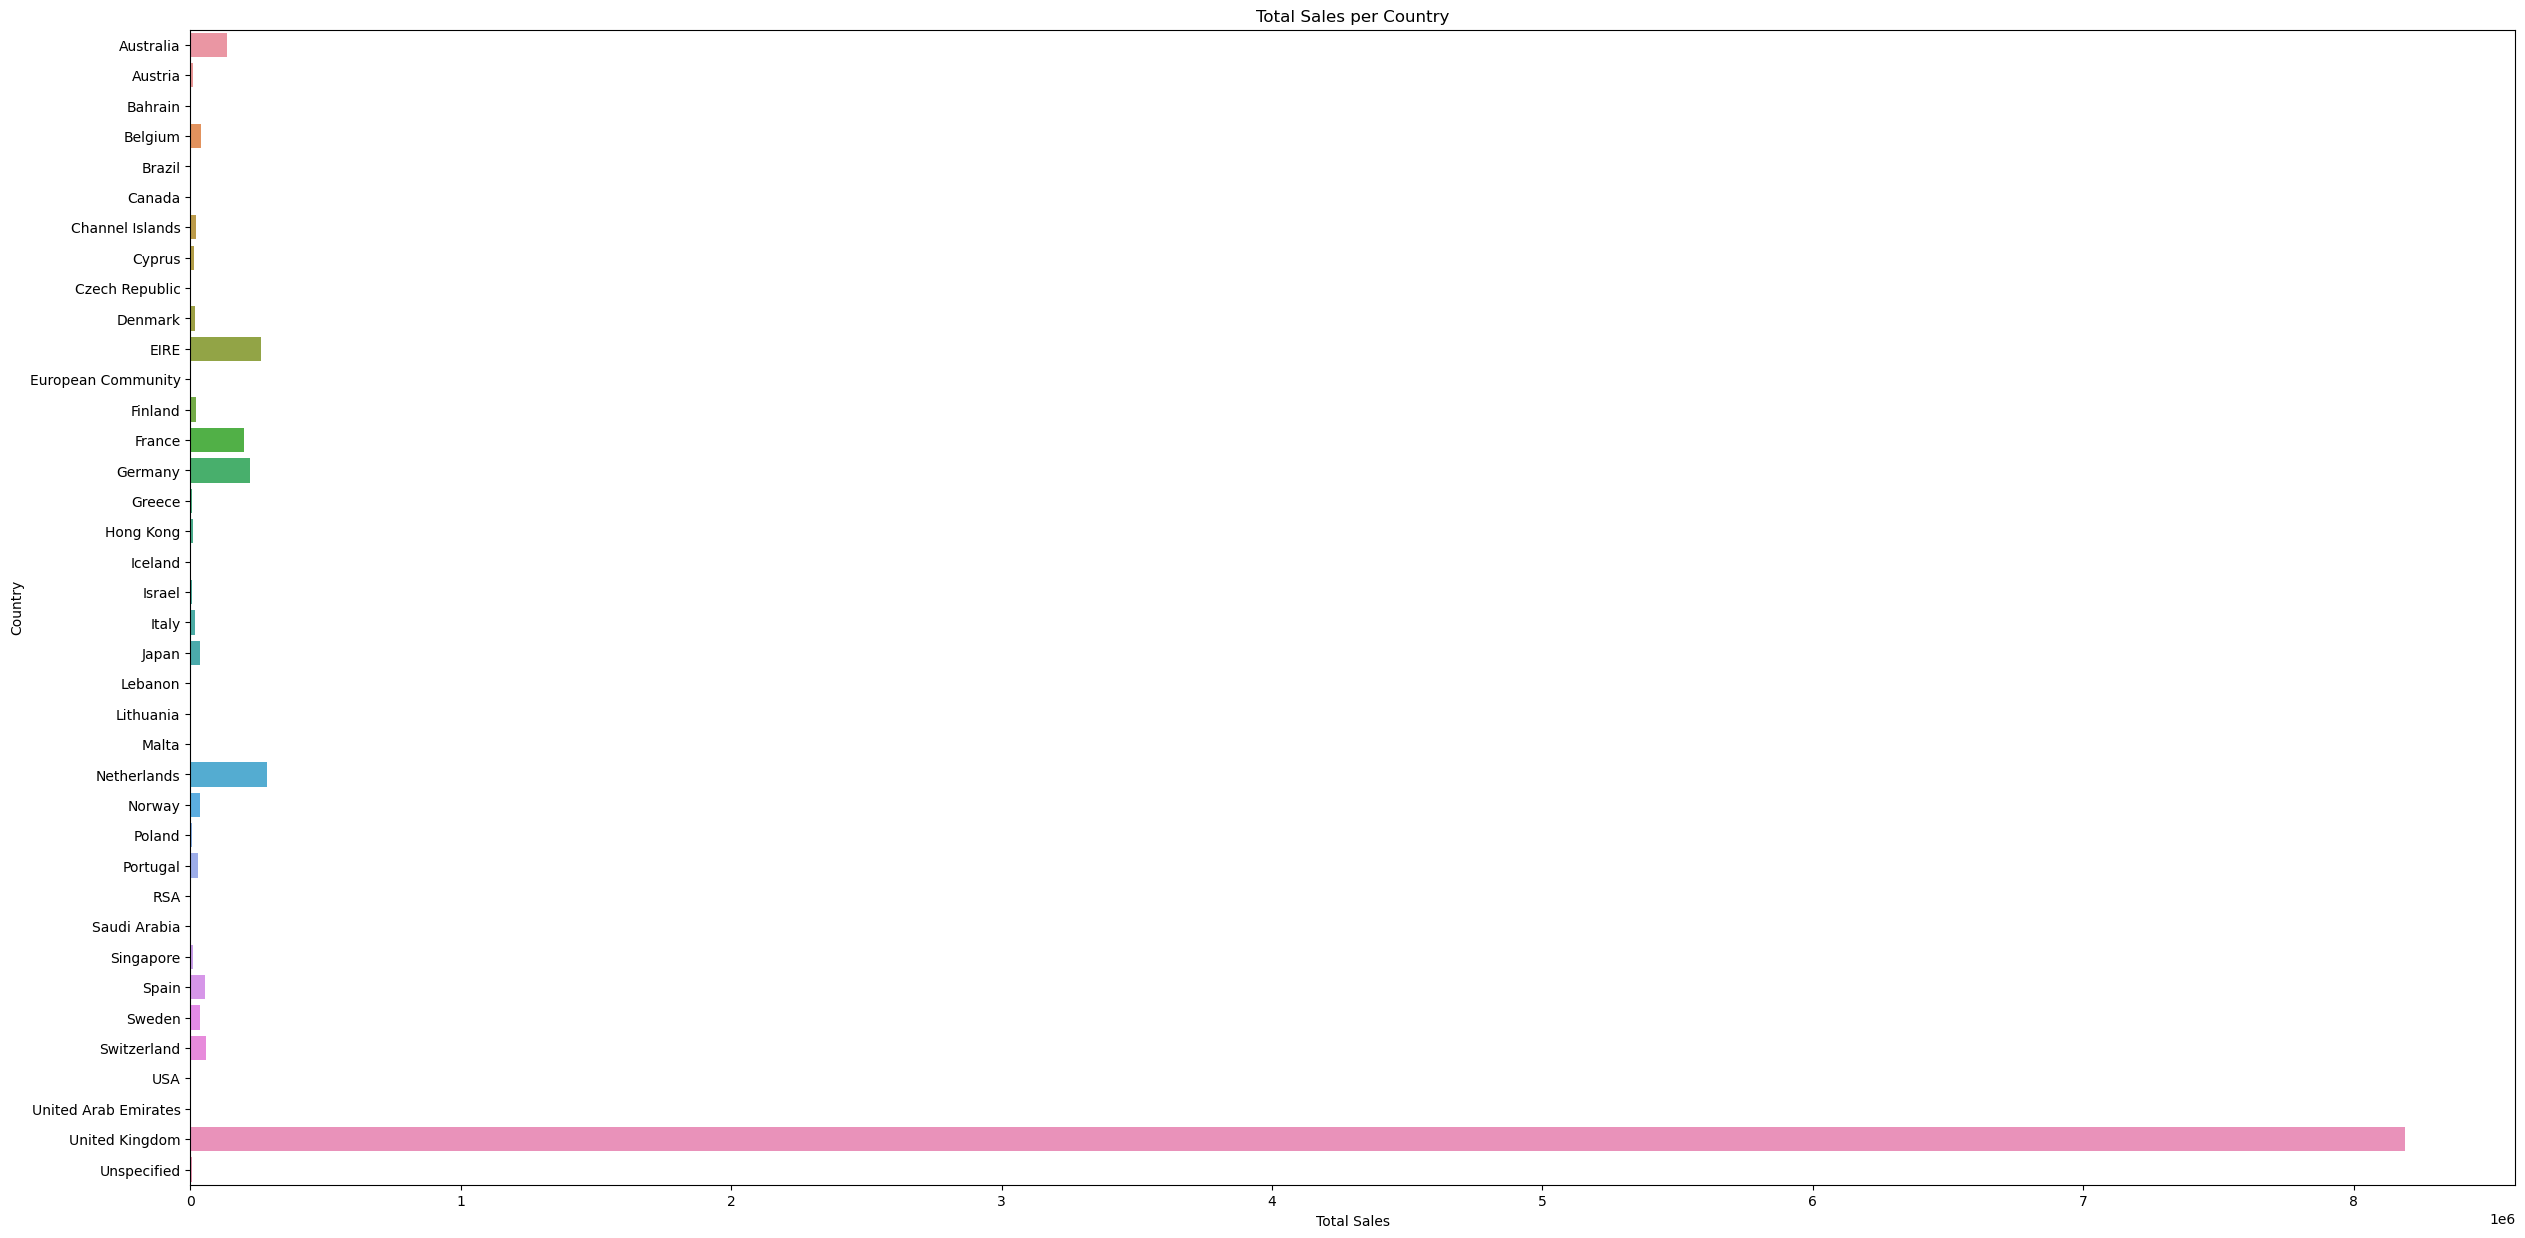

In [59]:
# Sales per country

plt.figure(figsize =(30,15))
sbn.barplot(y = sales_per_country.index, x = sales_per_country.values)
plt.title('Total Sales per Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

**Customer Segmentation**

- Segment customers based on their total purchase behavior using metrics like Recency, Frequency, and Monetary (RFM) values to segment them.

In [62]:
# RFM segmentation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (Number of purchases)
    'Sales': 'sum'  # Monetary (Total sales amount)
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Categorize customers based on these values

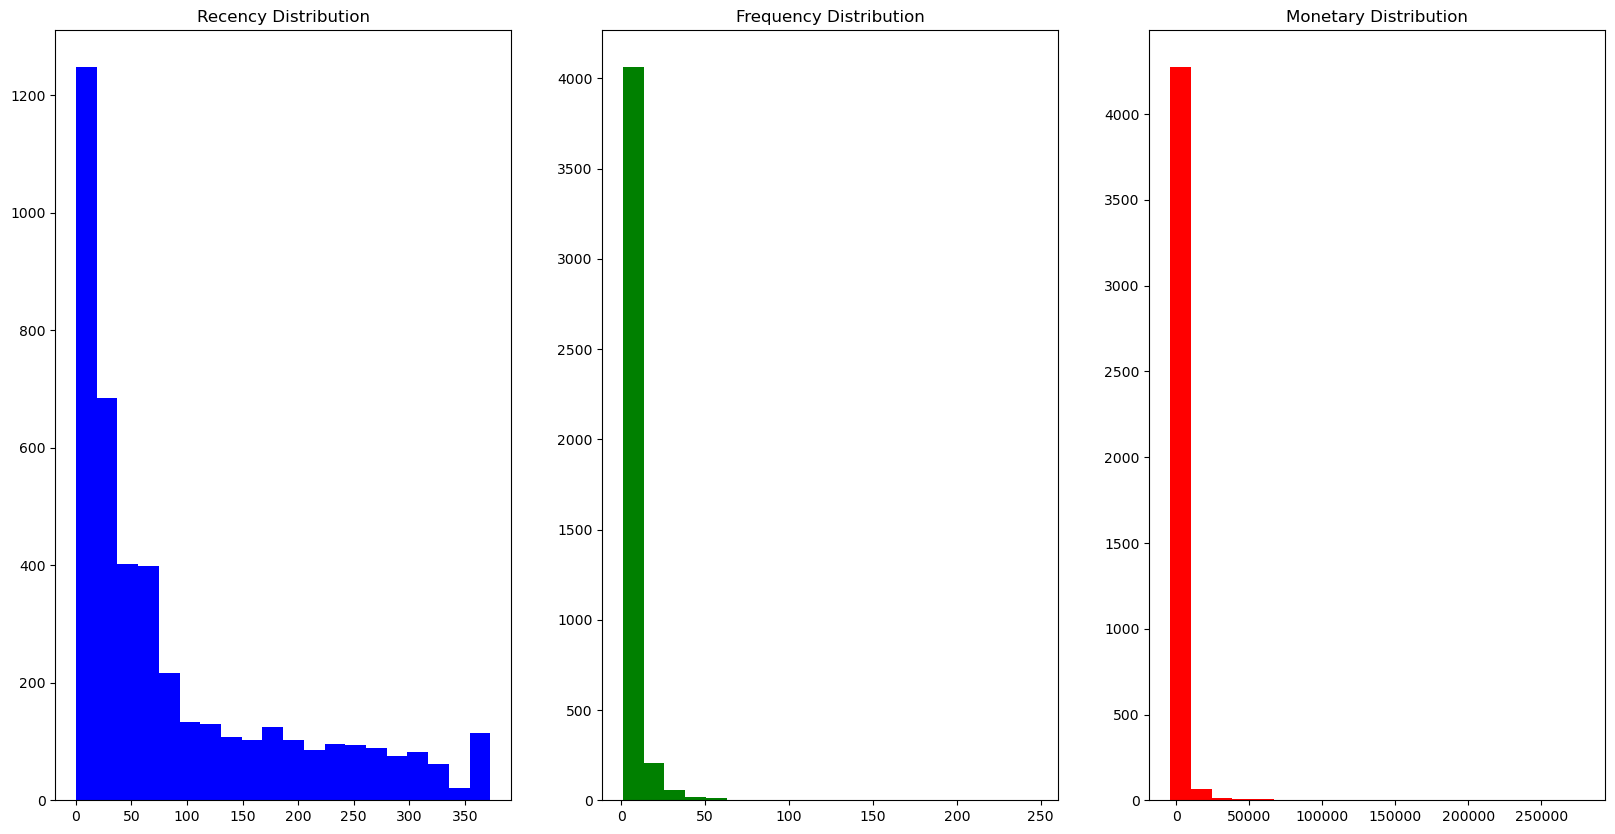

In [63]:
# Plot histograms for RFM metrics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.hist(rfm['Recency'], bins=20, color='blue')
ax1.set_title('Recency Distribution')

ax2.hist(rfm['Frequency'], bins=20, color='green')
ax2.set_title('Frequency Distribution')

ax3.hist(rfm['Monetary'], bins=20, color='red')
ax3.set_title('Monetary Distribution')

plt.show()

- Monetary Distributionn has negative values because of return items

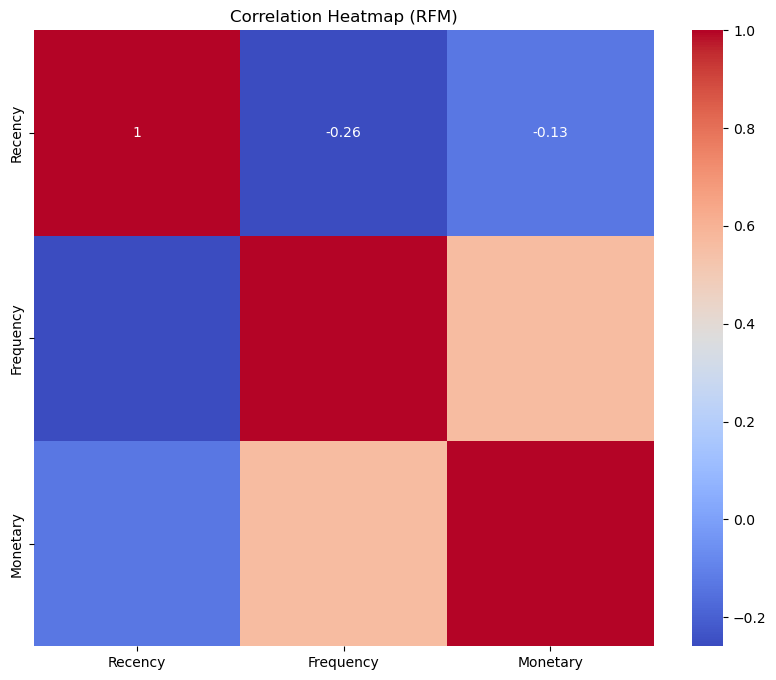

In [65]:
# Create a correlation matrix for RFM scores
rfm_corr = rfm[['Recency', 'Frequency', 'Monetary']].corr()

# Plot heatmap
plt.figure(figsize = (10, 8))
sbn.heatmap(rfm_corr, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap (RFM)')
plt.show()

- There is a significantly strong correlation between **Frequency** (How often a  customer frequents the store) and **Monetary** (The amount of money spent)

**Popularity of product**

In [69]:
product_sales = df.groupby('StockCode')['Sales'].sum()
product_sales

StockCode
10002            759.89
10080            119.09
10120             40.53
10125            994.84
10133           1540.02
                 ...   
gift_0001_20     167.05
gift_0001_30     175.53
gift_0001_40     100.70
gift_0001_50     167.56
m                  2.55
Name: Sales, Length: 4070, dtype: float64

- above results shows the top 5 most popular products and a list of 5 least popular products

In [71]:
product_quantity = df.groupby('StockCode')['Quantity'].sum()
product_quantity

StockCode
10002           1037
10080            495
10120            193
10125           1296
10133           2775
                ... 
gift_0001_20      20
gift_0001_30      37
gift_0001_40       3
gift_0001_50       4
m                  1
Name: Quantity, Length: 4070, dtype: int64

- this shows the units sold per product

**Sales Trend Analysis**

In [74]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [75]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_of_the_week,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,16.60


In [76]:
df1 = df.copy()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_of_the_week,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,16.60


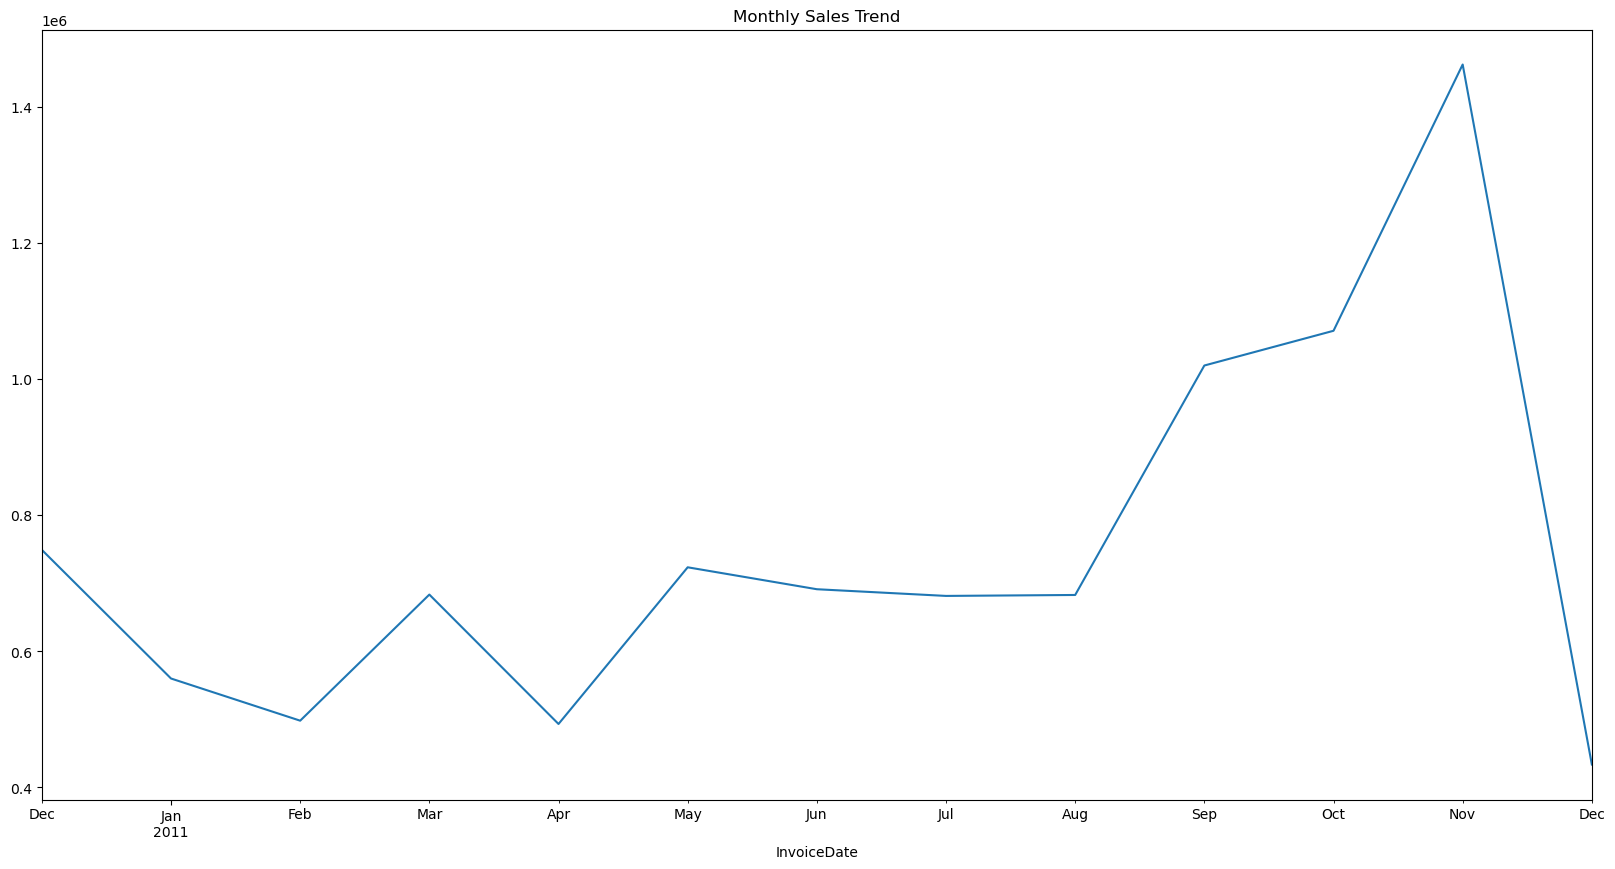

In [77]:
# Set 'InvoiceDate' as the index
df1.set_index('InvoiceDate', inplace=True)

# Resample sales by month to see the overall trend
monthly_sales = df1['Sales'].resample('M').sum()

# Plot sales trends
monthly_sales.plot(title='Monthly Sales Trend', figsize=(20,10));

**Returns Analysis**

In [79]:
# Filter out the returns (negative quantities)
returns = df[df['Quantity'] < 0]

# Group by 'Country' and sum the returned quantities
returns_by_country = returns.groupby('Country')['Quantity'].sum()

# Display top countries with the highest returns
returns_by_country.sort_values(ascending = True)

Country
United Kingdom       -469990
EIRE                   -4810
Germany                -1815
France                 -1624
USA                    -1424
Spain                  -1127
Netherlands             -809
Japan                   -798
Australia               -556
Sweden                  -446
Switzerland             -305
Italy                   -113
Norway                   -91
Belgium                  -85
Czech Republic           -79
Portugal                 -78
Israel                   -56
Austria                  -54
Bahrain                  -54
Denmark                  -47
Cyprus                   -44
Finland                  -38
Poland                   -31
Malta                    -26
Channel Islands          -12
Singapore                 -7
Saudi Arabia              -5
Hong Kong                 -4
European Community        -2
Greece                    -1
Name: Quantity, dtype: int64

- This shows the returned items per country.
- United Kingdom also has the highest sales

**Customer Retention Analysis**

In [82]:
returning_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
returning_customers

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

In [83]:
retention_rate = (returning_customers > 1).mean()

print(f"Retention Rate: {retention_rate:.2%}")

Retention Rate: 69.97%


**Basket Analysis**

- we are trying to see which product is frequently bought
- this can be done by applying Apriori algorithm

In [87]:
# an idea of this code was ran earlier

product_sales = df.groupby('StockCode')['Sales'].sum()
product_sales

StockCode
10002            759.89
10080            119.09
10120             40.53
10125            994.84
10133           1540.02
                 ...   
gift_0001_20     167.05
gift_0001_30     175.53
gift_0001_40     100.70
gift_0001_50     167.56
m                  2.55
Name: Sales, Length: 4070, dtype: float64

In [89]:
# Create a basket matrix (1 if product bought in an invoice, else 0)
basket = df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket.astype('bool'), min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display top 10 rules
rules.sort_values(by='lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
683,(23172),(23171),0.011776,0.014710,0.010734,0.911475,61.961189,0.010560,11.130123,0.995585
682,(23171),(23172),0.014710,0.011776,0.010734,0.729659,61.961189,0.010560,3.655469,0.998550
681,(23172),(23170),0.011776,0.017181,0.010386,0.881967,51.332474,0.010184,8.326657,0.992203
680,(23170),(23172),0.017181,0.011776,0.010386,0.604494,51.332474,0.010184,2.498634,0.997660
679,(23171),(23170),0.014710,0.017181,0.012317,0.837270,48.731015,0.012064,6.039578,0.994103
678,(23170),(23171),0.017181,0.014710,0.012317,0.716854,48.731015,0.012064,3.479793,0.996602
649,(22746),(22745),0.012664,0.016332,0.010039,0.792683,48.535432,0.009832,4.744751,0.991959
648,(22745),(22746),0.016332,0.012664,0.010039,0.614657,48.535432,0.009832,2.562228,0.995658
653,(22748),(22746),0.016834,0.012664,0.010116,0.600917,47.450492,0.009903,2.474014,0.995687
652,(22746),(22748),0.012664,0.016834,0.010116,0.798780,47.450492,0.009903,4.886037,0.991482


We will use row 683 for analysis:
- *If a customer buys item 23172 antecedent, they are highly likely (91.15% confidence) to also buy item 23171 consequent.*
- *Lift*: Shows the streng of association between items. The chance of buying 23171 increases by a factor of 61.96 when 23172 is bought.
- *Leverage*: This pair of items occurs together about 1.06% more often than would be expected by chance.
- *Conviction*: A conviction of 11.13 suggests that item 23171 is strongly associated with 23172.

**Price analysis**

In [93]:
# Correlation between price and quantity sold
price_correlation = df[['UnitPrice', 'Quantity']].corr()

print(price_correlation)

           UnitPrice  Quantity
UnitPrice   1.000000 -0.001235
Quantity   -0.001235  1.000000


- this correlation score is very week.
- the -ve sign shows that ideally an decrease in UnitPrice leads to an increase in Quantity.
- However, the correlation score here is very small so it can be considered negligible

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        541909 non-null  object        
 1   StockCode        541909 non-null  object        
 2   Description      540455 non-null  object        
 3   Quantity         541909 non-null  int64         
 4   InvoiceDate      541909 non-null  datetime64[ns]
 5   UnitPrice        541909 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          541909 non-null  object        
 8   Month            541909 non-null  int32         
 9   day_of_the_week  541909 non-null  int32         
 10  Sales            541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 41.3+ MB


**Customer Lifetime Value (CLTV)**

In [98]:
# Use RFM data to estimate Customer Lifetime Value (CLV)
rfm['CLTV'] = rfm['Frequency'] * rfm['Monetary']

# Sort and display the top 5 customers by CLTV
rfm.sort_values(by='CLTV', ascending=False).head(5)

,Recency,Frequency,Monetary,CLTV
CustomerID,,,,
14911.0,0,248,132572.62,32878009.76
14646.0,1,77,279489.02,21520654.54
18102.0,0,62,256438.49,15899186.38
17450.0,7,55,187482.17,10311519.35
14156.0,9,66,113384.14,7483353.24


- The CLTV in this case is too high to give an meaningful insight.
- However, from the CLTV analysis, we are able to see the top 5 most valuable customers in this business.